In [1]:
import pandas as pd
import seaborn as sns

import torchaudio

import numpy as np

In [2]:
import os 
os.environ['TOKENIZERS_PARALLELISM'] = 'true'

In [3]:
from transformers import PreTrainedTokenizerFast

In [4]:
tokenizer_file = 'data/tokenizer/trained_tokenizer.json'

try: ##Check if tokenizer is defined
    tokenizer

except NameError as e: ## If tokenizer is not defined then initialize it
    tokenizer = PreTrainedTokenizerFast(tokenizer_file=tokenizer_file)

finally:
    special_tokens_dict = {'pad_token': '[PAD]',
                       'sep_token': '[SEP]',
                       'mask_token': '[MASK]'}
    
    tokenizer.add_special_tokens(special_tokens_dict)
    
    blank_token = "[PAD]"
    blank_token_id = tokenizer.vocab[blank_token]
    
    vocab_size = len(tokenizer)

In [5]:
df = pd.read_csv('./data/external/cv-corpus-8.0-2022-01-19/en/train.tsv', sep = '\t')

In [6]:
df = df.drop(['gender', 'locale', 'client_id'], axis = 1)

In [7]:
df = df.dropna(how = 'all', axis = 1)

/home/ashim/miniconda3/envs/speech/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='up_votes', ylabel='Density'>

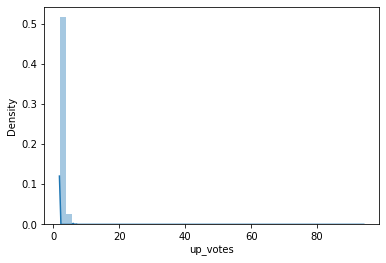

In [8]:
sns.distplot(df['up_votes'])

In [9]:
df[(df['up_votes'] - df['down_votes']) < 2]

,path,sentence,up_votes,down_votes,age,accents
3,common_voice_en_28449986.mp3,Eleva and Strum each house an elementary school.,2,1,NaN,NaN
15,common_voice_en_20783579.mp3,Trivers' theory is very powerful.,2,1,NaN,NaN
19,common_voice_en_23612307.mp3,"The movie ""Owning Mahowny"" was based on Ross's...",2,1,twenties,NaN
21,common_voice_en_26972322.mp3,The invaders who reached the shore were repuls...,2,1,NaN,NaN
22,common_voice_en_26972323.mp3,Tracer ammunition was identified by painting t...,2,1,NaN,NaN
...,...,...,...,...,...,...
827084,common_voice_en_22130324.mp3,The inhabitants apparently all benefited from ...,2,1,thirties,United States English
827088,common_voice_en_22130402.mp3,The quickstep is elegant like the foxtrot and ...,2,1,thirties,United States English
827089,common_voice_en_22130406.mp3,This cartridge was originally designed as a bl...,2,1,thirties,United States English
827092,common_voice_en_22130493.mp3,I'm obviously not going to be revelling in the...,2,1,thirties,United States English


In [10]:
df.describe()

,up_votes,down_votes
count,864448.000000,864448.000000
mean,2.140156,0.173734
std,0.519669,0.408876
min,2.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,94.000000,6.000000


In [11]:
df['words'] = df['sentence'].map(lambda x: len(x.split(' ')))

<AxesSubplot:ylabel='Frequency'>

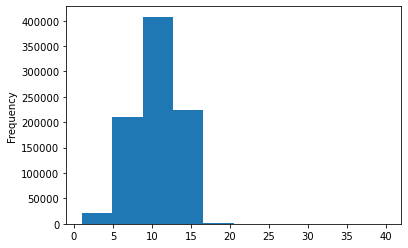

In [12]:
df['words'].plot(kind = 'hist')

In [13]:
df['characters'] = df['sentence'].map(lambda x: len(x))

<AxesSubplot:ylabel='Frequency'>

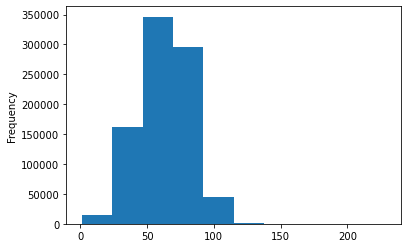

In [14]:
df['characters'].plot(kind = 'hist')

In [15]:
df.describe()

,up_votes,down_votes,words,characters
count,864448.000000,864448.000000,864448.000000,864448.000000
mean,2.140156,0.173734,10.296428,63.076503
std,0.519669,0.408876,2.779394,18.966438
min,2.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,8.000000,50.000000
50%,2.000000,0.000000,11.000000,64.000000
75%,2.000000,0.000000,13.000000,77.000000
max,94.000000,6.000000,40.000000,229.000000


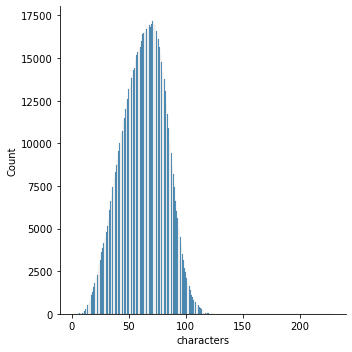

In [16]:
sns.displot(df['characters'])

In [17]:
df[df['characters'] > 100]

,path,sentence,up_votes,down_votes,age,accents,words,characters
7,common_voice_en_20293213.mp3,"It rapidly became a bible for gardeners, self-...",2,0,NaN,NaN,13,101
77,common_voice_en_23687188.mp3,"With improved transportation routes, such as Y...",2,1,NaN,NaN,14,109
98,common_voice_en_20009604.mp3,"By freeing religion of supernaturalism, it wil...",2,0,fifties,Australian English,14,103
100,common_voice_en_19655186.mp3,"A software distributor, for example, may seek ...",2,0,NaN,NaN,14,107
201,common_voice_en_20147452.mp3,"Unfortunately, with several different ways of ...",2,0,NaN,NaN,13,102
...,...,...,...,...,...,...,...,...
864028,common_voice_en_28674231.mp3,"The post-WrestleMania ""Raw"" has typically feat...",4,0,fifties,"German English,Non native speaker",14,114
864248,common_voice_en_28732180.mp3,The academy provides a serious program for pre...,4,0,fifties,"German English,Non native speaker",14,102
864250,common_voice_en_28732182.mp3,"After operations have ceased, military organis...",4,0,fifties,"German English,Non native speaker",13,101
864317,common_voice_en_28752779.mp3,Although Wortham was Browning's nephew and fir...,4,0,fifties,"German English,Non native speaker",14,101


In [18]:
sentence_list = df['sentence'].values.tolist()

In [19]:
tokenized_dict = tokenizer(sentence_list, return_attention_mask=False, return_token_type_ids=False, return_special_tokens_mask=False, return_length=True)

In [20]:
df['token_ids'] = tokenized_dict['input_ids']
df['token_lengths'] = tokenized_dict['length']

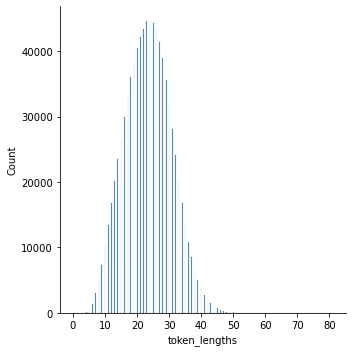

In [21]:
sns.displot(df['token_lengths'])

In [22]:
df.describe()

,up_votes,down_votes,words,characters,token_lengths
count,864448.000000,864448.000000,864448.000000,864448.000000,864448.000000
mean,2.140156,0.173734,10.296428,63.076503,23.457702
std,0.519669,0.408876,2.779394,18.966438,7.306562
min,2.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,8.000000,50.000000,18.000000
50%,2.000000,0.000000,11.000000,64.000000,23.000000
75%,2.000000,0.000000,13.000000,77.000000,28.000000
max,94.000000,6.000000,40.000000,229.000000,81.000000


In [23]:
datasetPATH = 'data/external/cv-corpus-8.0-2022-01-19/en/'
clipsPATH = os.path.join(datasetPATH, 'clips')

In [24]:
from utils.preprocess import Preprocessing

In [25]:
preprocessing = Preprocessing(out_channels= 1, out_sampling_rate = 16000, tokenizer = tokenizer)

In [36]:
def construct_mel_spec(item):

    audio_file_path = os.path.join(clipsPATH, item['path'])

    waveform, source_sampling_rate = torchaudio.load(audio_file_path)
    waveform, out_sampling_rate = preprocessing.preprocess_waveform(waveform, source_sampling_rate)

    melspec = preprocessing.extract_features(waveform)
        
    return melspec

In [ ]:
def get_time_length(item):
    
    melspec = item['melspec']
    length = np.array(melspec).shape[1]
    
    return length

In [41]:
df['melspec'] = df.apply(construct_mel_spec, axis = 1)
df['melspec_length'] = df.apply(get_time_length, axis = 1)

In [76]:
df.to_csv('./data/internal/train_data_stats.csv', index=None)

In [52]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

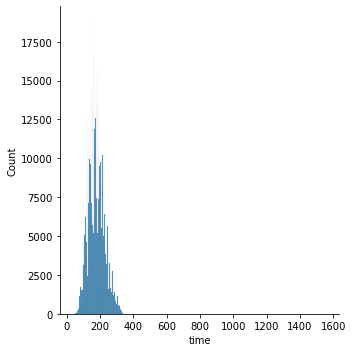

In [45]:
sns.displot(df['time'])

In [49]:
df[df['time']> 250]

,path,sentence,up_votes,down_votes,age,accents,words,characters,token_ids,token_lengths,time
16,common_voice_en_23612263.mp3,"The town features a curling rink, arena, outdo...",2,0,twenties,NaN,14,90,"[222, 525, 732, 717, 53, 501, 64, 219, 70, 200...",35,303
20,common_voice_en_26972321.mp3,"It was named after Blackpool, which is a large...",2,0,NaN,NaN,12,63,"[268, 233, 641, 508, 24, 64, 360, 318, 236, 15...",20,309
22,common_voice_en_26972323.mp3,Tracer ammunition was identified by painting t...,2,1,NaN,NaN,10,64,"[914, 231, 201, 232, 65, 253, 455, 233, 679, 6...",24,290
31,common_voice_en_21780393.mp3,"As with other salmonid genera, the delimitatio...",2,0,NaN,NaN,13,92,"[615, 276, 404, 71, 209, 561, 247, 760, 53, 15...",33,307
45,common_voice_en_26987720.mp3,Liverpool Road intersects with Coronation Para...,2,0,NaN,NaN,11,79,"[34, 889, 318, 236, 715, 237, 488, 230, 765, 2...",29,253
...,...,...,...,...,...,...,...,...,...,...,...
864429,common_voice_en_28823383.mp3,"As a result, substantial discussion of Wilson'...",4,2,NaN,"German English,Non native speaker",13,84,"[615, 53, 277, 475, 15, 585, 223, 335, 467, 41...",31,253
864432,common_voice_en_28823401.mp3,In addition to personal attacks from political...,4,0,NaN,"German English,Non native speaker",13,95,"[323, 728, 455, 221, 892, 204, 209, 472, 360, ...",34,276
864434,common_voice_en_28823412.mp3,The area is largely bereft of tower blocks of ...,4,0,NaN,"German English,Non native speaker",13,78,"[222, 694, 206, 867, 234, 54, 306, 58, 72, 216...",29,272
864444,common_voice_en_28823514.mp3,"This square contains a small shopping arcade, ...",4,0,NaN,"German English,Non native speaker",12,78,"[351, 71, 312, 245, 422, 992, 53, 792, 294, 29...",30,286


In [51]:
df[df.time > 300]

,path,sentence,up_votes,down_votes,age,accents,words,characters,token_ids,token_lengths,time
16,common_voice_en_23612263.mp3,"The town features a curling rink, arena, outdo...",2,0,twenties,NaN,14,90,"[222, 525, 732, 717, 53, 501, 64, 219, 70, 200...",35,303
20,common_voice_en_26972321.mp3,"It was named after Blackpool, which is a large...",2,0,NaN,NaN,12,63,"[268, 233, 641, 508, 24, 64, 360, 318, 236, 15...",20,309
31,common_voice_en_21780393.mp3,"As with other salmonid genera, the delimitatio...",2,0,NaN,NaN,13,92,"[615, 276, 404, 71, 209, 561, 247, 760, 53, 15...",33,307
77,common_voice_en_23687188.mp3,"With improved transportation routes, such as Y...",2,1,NaN,NaN,14,109,"[45, 266, 248, 279, 358, 261, 202, 397, 346, 2...",40,323
111,common_voice_en_26966301.mp3,"Brickworks, grain elevators, a floor mill were...",2,0,NaN,NaN,9,59,"[912, 526, 424, 71, 15, 328, 270, 562, 74, 208...",24,304
...,...,...,...,...,...,...,...,...,...,...,...
864384,common_voice_en_28817570.mp3,"Organized by Bill McCorkle, the event attracte...",4,2,NaN,"German English,Non native speaker",12,81,"[37, 70, 606, 841, 271, 24, 299, 35, 55, 25, 2...",37,326
864391,common_voice_en_28823092.mp3,"Calling it the ""most massive of all human migr...",4,0,NaN,"German English,Non native speaker",13,76,"[25, 278, 219, 215, 203, 7, 494, 65, 385, 313,...",32,313
864394,common_voice_en_28823139.mp3,A worldwide directory of poison centers is ava...,4,0,NaN,"German English,Non native speaker",14,98,"[23, 345, 350, 75, 391, 842, 257, 492, 216, 31...",38,321
864419,common_voice_en_28823332.mp3,Within the Greens-European Free Alliance parli...,4,2,NaN,"German English,Non native speaker",14,109,"[45, 266, 200, 203, 29, 205, 584, 16, 27, 73, ...",43,329


In [48]:
df.describe()

,up_votes,down_votes,words,characters,token_lengths,time
count,864448.000000,864448.000000,864448.000000,864448.000000,864448.000000,864448.000000
mean,2.140156,0.173734,10.296428,63.076503,23.457702,178.726162
std,0.519669,0.408876,2.779394,18.966438,7.306562,49.800336
min,2.000000,0.000000,1.000000,1.000000,0.000000,37.000000
25%,2.000000,0.000000,8.000000,50.000000,18.000000,143.000000
50%,2.000000,0.000000,11.000000,64.000000,23.000000,175.000000
75%,2.000000,0.000000,13.000000,77.000000,28.000000,211.000000
max,94.000000,6.000000,40.000000,229.000000,81.000000,1560.000000


In [56]:
import matplotlib.pyplot as plt

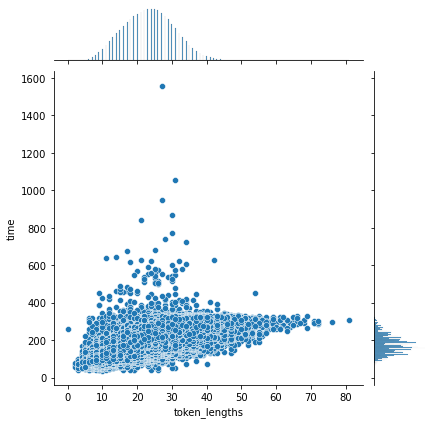

In [61]:
sns.jointplot(data = df, x = 'token_lengths', y = 'time')
plt.show()

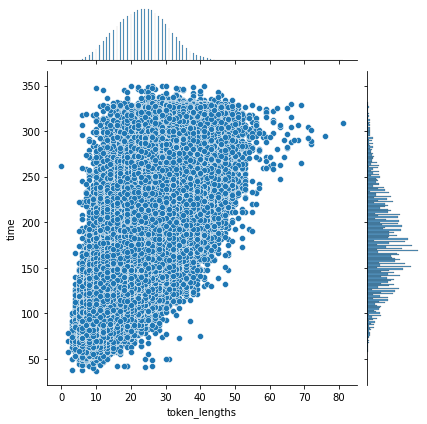

In [71]:
sns.jointplot(data = df[df.time <= 350], x = 'token_lengths', y = 'time')
plt.show()

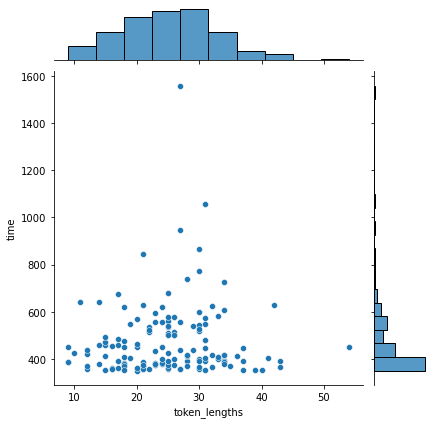

In [70]:
sns.jointplot(data = df[df.time >= 350], x = 'token_lengths', y = 'time')
plt.show()

In [72]:
train_trimmed = df[df['time'] <= 350]

In [75]:
train_trimmed.to_csv('train_trimmed.tsv', index = None, sep = '\t')

In [80]:
train_trimmed

,path,sentence,up_votes,down_votes,age,accents,words,characters,token_ids,token_lengths,time
0,common_voice_en_28449980.mp3,Thereafter the class was highly respected.,2,0,NaN,NaN,6,42,"[484, 508, 203, 961, 233, 749, 234, 277, 293, ...",11,161
1,common_voice_en_28449981.mp3,Banaras Hindu University is a Central Universi...,2,0,NaN,NaN,9,63,"[24, 202, 214, 212, 30, 200, 371, 853, 206, 53...",23,204
2,common_voice_en_28449984.mp3,"On display are home furnishings, pioneer tools...",2,0,NaN,NaN,12,77,"[824, 419, 416, 245, 879, 58, 558, 377, 527, 1...",30,245
3,common_voice_en_28449986.mp3,Eleva and Strum each house an elementary school.,2,1,NaN,NaN,8,48,"[27, 225, 74, 53, 217, 41, 261, 283, 985, 60, ...",17,179
4,common_voice_en_20293200.mp3,The eastern portion of the county lies within ...,2,0,NaN,NaN,12,71,"[222, 57, 212, 589, 456, 224, 216, 203, 524, 3...",26,143
...,...,...,...,...,...,...,...,...,...,...,...
864443,common_voice_en_28823456.mp3,"The patricians opposed these laws, though they...",4,2,NaN,"German English,Non native speaker",10,67,"[222, 68, 208, 846, 365, 71, 292, 477, 207, 67...",23,250
864444,common_voice_en_28823514.mp3,"This square contains a small shopping arcade, ...",4,0,NaN,"German English,Non native speaker",12,78,"[351, 71, 312, 245, 422, 992, 53, 792, 294, 29...",30,286
864445,common_voice_en_28823525.mp3,Homestead also sends a contingent to the annua...,4,0,NaN,"German English,Non native speaker",11,77,"[30, 235, 298, 57, 237, 288, 71, 334, 71, 53, ...",31,314
864446,common_voice_en_28823526.mp3,"The British ""Cliff Hanger"" was written and dra...",4,2,NaN,"German English,Non native speaker",12,71,"[222, 24, 423, 377, 7, 25, 327, 58, 58, 30, 43...",30,222


In [1]:
import pandas as pd

In [2]:
train_t = pd.read_csv('data/internal/train_trimmed.tsv', sep = '\t')

In [4]:
train_t.sample(4192).to_csv('data/internal/sample_train.tsv', index=None, sep = '\t')

In [ ]:
train_t_4192 = train_t.sample